## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams. Some of these scam e-mails have some offensive content. I don't think anything is worse than R-rated, but I just want to warn you that if you start reading the e-mail text, you might read something offensive. If that's a problem, feel free to e-mail me and we can talk about it more or you can skip the assignment.  

### Q1.

Open the `Phishing_Email.parquet` data. It is available at `https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet`, and you can download it directly using Pandas by providing that URL: `df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')`.

We just want to look at the first step of cleaning text data, so you can get an idea of how it works. The `Email Text` variable contains the actual text of the email and the `Email Type` takes the value `Phishing Email` or `Safe Email`. We want to predict which emails are phishing emails from their contents.

Use the `str.split()` method to break the `Phishing Email` values into **tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens. Print the results of your split and examine it.

In words, how would you clean the tokens and use them to predict whether the email is a phishing scam or not? A short summary of the kinds of tasks you would do and how you would run a predictive algorithm is fine.

In [1]:
import pandas as pd
import pickle

In [2]:
df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')

In [3]:
df.head()

,index,Unnamed: 0,Email Text,Email Type
0,0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [4]:
tokens = df['Email Text'].str.split()

In [5]:
tokens.head()

,Email Text
0,"[re, :, 6, ., 1100, ,, disc, :, uniformitarian..."
1,"[the, other, side, of, *, galicismos, *, *, ga..."
2,"[re, :, equistar, deal, tickets, are, you, sti..."
3,"[Hello, I, am, your, hot, lil, horny, toy., I,..."
4,"[software, at, incredibly, low, prices, (, 86,..."


I would first remove the stop words/very common words from the tokens so words like "the" or "I" or "at" do not contribute to the predictive model. Then I would one-hot encode the tokens and create models that predict whether an email is phishing or not based on its tokens.

### Q2.

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [7]:
with open('/content/all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

In [8]:
token_freq[1:10]

[('date', 1202),
 ('get', 1052),
 ('please', 1022),
 ('enron', 927),
 ('like', 923),
 ('2002', 869),
 ('would', 806),
 ('one', 798),
 ('message', 795)]

In [9]:
token_df = pd.DataFrame(token_freq, columns = ['Token', 'Count'])
token_df.head()

,Token,Count
0,new,1365
1,date,1202
2,get,1052
3,please,1022
4,enron,927


Plot a histogram of the occurrences of tokens. What do you notice about the frequency of occurrence of different tokens? How does it look?

<Axes: >

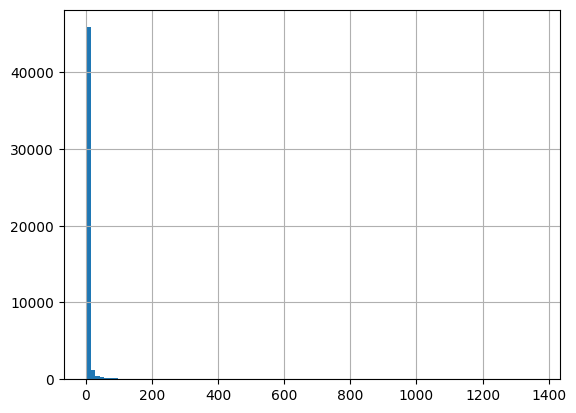

In [10]:
token_df['Count'].hist(bins = 100)

Most tokens seem to only appear a few times, and there are some outliers that appear upwards of 1000 times. When it comes to predicting scam emails based on this, the model may not predict accurately if it is based on tokens that appear too frequently or not frequently enough, limiting its ability to correlate to a specific type of email.

### Q3.

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions?

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

In [14]:
df = pd.read_parquet("/content/Phishing_clean.parquet")
df.head()

,Email Type,new,date,get,please,enron,like,2002,would,one,...,ï¿½ï¿½,safety,yap,ypil,maintain,procedures,tip,elizabeth,leadership,italian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# 80/20 train-test split
y = df['Email Type']
X = df.drop('Email Type',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
# Regression on y on the one-hot-encoded emails
lm = LinearRegression(fit_intercept=False).fit(X_train,y_train)
y_hat_test = lm.predict(X_test)
y_hat_train = lm.predict(X_train)

# R2 on test set
print( "R2 on Test Set:", r2_score(y_hat_test,y_test))


# R2 on train set
print( "R2 on Training Set:" , r2_score(y_hat_train,y_train))

R2 on Test Set: -5.9470730218835754e-05
R2 on Training Set: 0.6321338672223646


In [23]:
rdf = pd.DataFrame({'variable':lm.feature_names_in_ , 'value':lm.coef_})
rdf['abs'] = np.abs(rdf['value'])
rdf.sort_values('abs',ascending=False)

,variable,value,abs
340,2005,-1.294304e+13,1.294304e+13
1722,70%,1.058217e+13,1.058217e+13
1898,250,1.045023e+13,1.045023e+13
1445,853,1.027592e+13,1.027592e+13
2278,6th,-1.019718e+13,1.019718e+13
...,...,...,...
2416,asia,1.831055e-04,1.831055e-04
172,morning,-1.525879e-04,1.525879e-04
1904,+0200,7.629395e-05,7.629395e-05
873,register,-5.340576e-05,5.340576e-05


The "words" with the highest coefficients in abs/most strongly influence predictions are primarily numbers or percentages. This may not be very useful in detecting scams as there numbers are pretty arbitrary.

### Q4.

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

<Axes: >

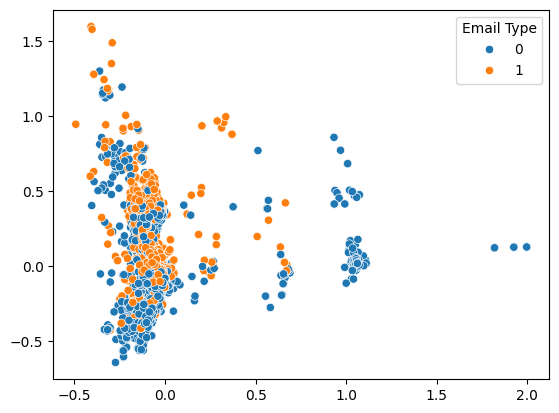

In [27]:
from sklearn.decomposition import PCA # Import PCA class
import seaborn as sns

pca = PCA(n_components = 2)
pca = pca.fit(X_train)
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)

sns.scatterplot(x = Z_test[:,0], y = Z_test[:,1], hue = y_test)

The scam emails have a higher score on the second component (y-axis) and low on the first component (x-axis). Most of the regular emails in blue follow this pattern as well, with some clustering low on both components and others scattered in the middle of the plot.

### Q5.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

In [29]:
pca = PCA(n_components = 2610)
pca = pca.fit(X_train)
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)

# Linear regression
lm = LinearRegression().fit(Z_train,y_train)
y_hat_test = lm.predict(Z_test)
y_hat_train = lm.predict(Z_train)

# R2 on test set
print("R2 on Training Set:", r2_score(y_hat_test,y_test))

# R2 on train set
print("R2 on Test Set:" , r2_score(y_hat_train,y_train))

R2 on Training Set: 0.5630480184418032
R2 on Test Set: 0.7000433447946304


In comparison to before, this model performs much better. The R2 on the test set is 0.700, which is a significant improvement from the negative R2 that resulted from the previous single linear regression. The test R2 is also much closer to the training R2 (0.563) with this linear regression.

### Q6.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.